# 0. Инициализация

In [1]:
import random
import matplotlib.pyplot as plt

# 1. Исходные данные

In [2]:
EDGES   = 6     # Количество граней на кубиках
CUBES   = 5     # Количество кубиков
STEPS   = 10000     # Количество ходов
WIN     = 1000  # Очки для победы
BARREL  = 900   # Очки для бочки

scopeSet = {}

# 2. Розыгрыш

In [3]:
def raffle(cubes):
    ''' Розыгрыш '''

    # Создание случайного набора кубов
    cubeSet = random.choices(range(1, EDGES + 1), k=cubes)
    
    return cubeSet

# 3. Оценка

## 3.1 Подсчёт одинаковых кубиков

In [4]:
def cubeCount(cubeSet):
    ''' Подсчёт одинаковых кубиков '''

    cubeCount = {}
    
    for item in cubeSet:
    
        if item in cubeCount:
            cubeCount[item] += 1
    
        else:
            cubeCount[item] = 1
    
    return cubeCount

## 3.2 Подсчёт количества очков

In [5]:
def grade(cubeCount):
    ''' Подсчёт количества очков '''

    scope = 0
    
    for key, value in cubeCount.items():

        if value == 5:
            scope = 1000

        if value == 4:
            scope += key*10 + 100

        if value == 3:
            if key == 1:
                scope += 100
            else:
                scope += key*10

        if value == 2:
            if key == 5:
                scope += 5*2
            if key == 1:
                scope += 10*2
            
        if value == 1:
            if key == 5:
                scope += 5
            if key == 1:
                scope += 10

    return scope 

## 3.3 Определение небикти

In [6]:
def checkStrike(cubeCount):
    ''' Определение небикти '''

    check = False

    # Копирование сета, чтобы при удалении ключа он не мешал итерации
    keys_to_remove = cubeCount.copy()

    for key, value in cubeCount.items():
        
        if value == 5:
            del keys_to_remove[key]

        if value == 4:
            del keys_to_remove[key]

        if value == 3:
            del keys_to_remove[key]

        if value == 2:
            del keys_to_remove[key]
        
        if value == 1:
            if key == 1:
                del keys_to_remove[key]
            if key == 5:
                del keys_to_remove[key]

    if not keys_to_remove:
        check = True

    return check


In [7]:
def scopeCount(score, scopeSet):
    ''' Подсчёт одинаковых очков '''
    
    if score in scopeSet:
        scopeSet[score] += 1
    else:
        scopeSet[score] = 1
    
    return scopeSet  # Return the dictionary with counts

# 4. Гейм

In [8]:
for game in range(STEPS):
    
    print(game)

    cubeSet = raffle(CUBES)
    print('Расклад: ', cubeSet)

    cubeSetCount = cubeCount(cubeSet)
    print('Подсчёт: ', cubeSetCount)

    scope = grade(cubeSetCount)
    print('Очки: ', scope)

    strike = checkStrike(cubeSetCount)
    if strike: 
        print('Небитка')

    if scope == 0:
        print('Булка')

    scopeSet = scopeCount(scope, scopeSet)

0
Расклад:  [6, 4, 5, 1, 5]
Подсчёт:  {6: 1, 4: 1, 5: 2, 1: 1}
Очки:  20
1
Расклад:  [6, 1, 5, 3, 6]
Подсчёт:  {6: 2, 1: 1, 5: 1, 3: 1}
Очки:  15
2
Расклад:  [4, 5, 3, 4, 2]
Подсчёт:  {4: 2, 5: 1, 3: 1, 2: 1}
Очки:  5
3
Расклад:  [5, 4, 2, 2, 3]
Подсчёт:  {5: 1, 4: 1, 2: 2, 3: 1}
Очки:  5
4
Расклад:  [5, 4, 3, 3, 3]
Подсчёт:  {5: 1, 4: 1, 3: 3}
Очки:  35
5
Расклад:  [6, 6, 4, 6, 6]
Подсчёт:  {6: 4, 4: 1}
Очки:  160
6
Расклад:  [1, 6, 2, 3, 3]
Подсчёт:  {1: 1, 6: 1, 2: 1, 3: 2}
Очки:  10
7
Расклад:  [4, 4, 1, 1, 4]
Подсчёт:  {4: 3, 1: 2}
Очки:  60
Небитка
8
Расклад:  [1, 1, 6, 4, 5]
Подсчёт:  {1: 2, 6: 1, 4: 1, 5: 1}
Очки:  25
9
Расклад:  [3, 6, 3, 5, 2]
Подсчёт:  {3: 2, 6: 1, 5: 1, 2: 1}
Очки:  5
10
Расклад:  [5, 3, 4, 3, 6]
Подсчёт:  {5: 1, 3: 2, 4: 1, 6: 1}
Очки:  5
11
Расклад:  [4, 4, 5, 4, 1]
Подсчёт:  {4: 3, 5: 1, 1: 1}
Очки:  55
Небитка
12
Расклад:  [2, 2, 2, 3, 5]
Подсчёт:  {2: 3, 3: 1, 5: 1}
Очки:  25
13
Расклад:  [4, 5, 3, 5, 4]
Подсчёт:  {4: 2, 5: 2, 3: 1}
Очки:  10
14
Раскла

# 5. Стратегии

## 5.1 Неазартная стратегия

In [10]:
# Ход     Отложить    Записать
# 1       25          50
# 2       25          50    
# 3       25          50


# 6. Статистика

# 6.1 Вероятность распределения очков

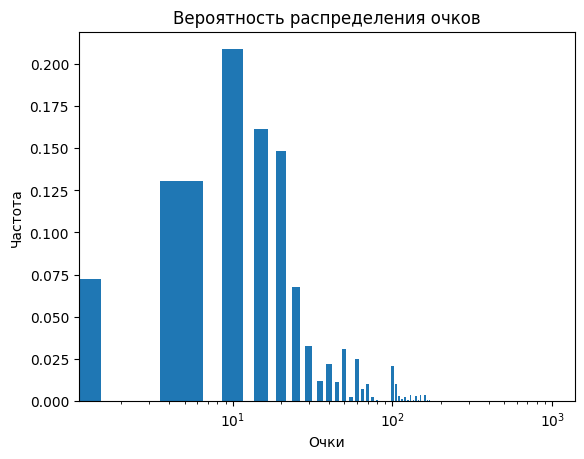

In [22]:
total_frequency = sum(scopeSet.values())
normalized_data = {key: value / total_frequency for key, value in scopeSet.items()}

plt.bar(normalized_data.keys(), normalized_data.values(), width=3)  # изменяем ширину столбцов
plt.xlabel('Очки')
plt.ylabel('Частота')
plt.title('Вероятность распределения очков')

# переходим к логарифмической шкале по оси x
plt.xscale('log')  

plt.show()
